In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Read the data
print("Loading data...")
df = pd.read_csv('../data/processed/ecommerce_data_with_features.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f" Loaded {len(df):,} records")
print(f" Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f" Products: {df['product_id'].nunique()}")
print(f" Categories: {df['category'].nunique()}")

# Display first few rows
df.head()

Loading data...
✅ Loaded 54,750 records
✅ Date range: 2023-01-01 00:11:00 to 2023-12-31 23:54:00
✅ Products: 20
✅ Categories: 5


,timestamp,product_id,category,brand,base_cost,price,competitor_price,stock_level,page_views,cart_adds,...,price_to_cost_ratio,price_vs_competitor,margin,margin_percent,views_to_cart_rate,cart_to_sale_rate,conversion_rate,inventory_pressure,demand_per_dollar,revenue_per_view
0,2023-01-01 11:19:00,PROD_004,Electronics,BrandD,70.81,120.62,108.57,450,334,45,...,1.703432,0.110988,49.81,41.294976,0.134731,0.934783,0.128358,high,0.356491,15.483104
1,2023-01-01 03:48:00,PROD_007,Clothing,BrandA,185.92,334.67,292.58,434,803,132,...,1.800075,0.143858,148.75,44.446768,0.164384,0.601504,0.099502,high,0.239041,33.300460
2,2023-01-01 19:12:00,PROD_006,Home & Kitchen,BrandC,12.45,22.20,24.56,168,819,186,...,1.783133,-0.096091,9.75,43.918919,0.227106,0.459893,0.104878,medium,3.873874,2.327951
3,2023-01-01 21:58:00,PROD_001,Home & Kitchen,BrandE,157.12,216.60,245.53,378,783,151,...,1.378564,-0.117827,59.48,27.460757,0.192848,0.532895,0.103316,high,0.373961,22.378316
4,2023-01-01 21:58:00,PROD_016,Clothing,BrandE,194.98,328.77,300.45,29,1184,266,...,1.686173,0.094259,133.79,40.694102,0.224662,0.108614,0.024473,low,0.088208,8.045890


In [4]:
# Quick data quality check
print("="*70)
print("DATA QUALITY REPORT")
print("="*70)
print(f"\nTotal records: {len(df):,}")
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nData types:")
print(df.dtypes)
print(f"\nBasic statistics:")
df[['price', 'sales_quantity', 'revenue', 'page_views', 'conversion_rate']].describe()

DATA QUALITY REPORT

Total records: 54,750

Missing values:
timestamp                    0
product_id                   0
category                     0
brand                        0
base_cost                    0
price                        0
competitor_price             0
stock_level                  0
page_views                   0
cart_adds                    0
sales_quantity               0
revenue                      0
customer_type                0
customer_purchase_history    0
hour                         0
day_of_week                  0
is_weekend                   0
is_holiday                   0
month                        0
day_of_month                 0
week_of_year                 0
quarter                      0
price_to_cost_ratio          0
price_vs_competitor          0
margin                       0
margin_percent               0
views_to_cart_rate           0
cart_to_sale_rate            0
conversion_rate              0
inventory_pressure           0
demand_per

,price,sales_quantity,revenue,page_views,conversion_rate
count,54750.000000,54750.000000,54750.000000,54750.000000,54750.000000
mean,170.610538,25.982959,4433.585439,362.850119,0.073332
std,95.402391,19.619805,4578.630470,201.042723,0.036245
min,14.810000,0.000000,0.000000,50.000000,0.000000
25%,104.010000,12.000000,1301.790000,202.000000,0.042254
50%,154.560000,21.000000,2995.770000,343.000000,0.069307
75%,247.977500,35.000000,5948.970000,485.000000,0.102088
max,406.720000,177.000000,55106.090000,1365.000000,0.149606


In [5]:
# Create output directory for plots
import os
os.makedirs('../data/processed/eda_visualizations', exist_ok=True)
print("Output directory created: ../data/processed/eda_visualizations/")

Output directory created: ../data/processed/eda_visualizations/


In [6]:
print("="*70)
print("SECTION 1: PRICE ELASTICITY ANALYSIS")
print("="*70)

# Calculate price elasticity by product category
def calculate_elasticity(group):
    """Calculate price elasticity of demand"""
    if len(group) < 10:
        return np.nan
    
    group = group.sort_values('price')
    price_pct_change = group['price'].pct_change()
    demand_pct_change = group['sales_quantity'].pct_change()
    elasticity = demand_pct_change / price_pct_change
    
    return elasticity.replace([np.inf, -np.inf], np.nan).mean()

elasticity_by_category = df.groupby('category').apply(calculate_elasticity)

print("\nPrice Elasticity by Category:")
print(elasticity_by_category.sort_values())
print("\n Interpretation:")
print("- Negative elasticity = Price ↑ → Demand ↓ (normal behavior)")
print("- Elasticity < -1 = Elastic (demand sensitive to price)")
print("- Elasticity > -1 = Inelastic (demand less sensitive)")

SECTION 1: PRICE ELASTICITY ANALYSIS

Price Elasticity by Category:
category
Books              7836.461357
Sports             8086.728376
Electronics        9557.365406
Home & Kitchen    10849.970633
Clothing          14793.110366
dtype: float64

 Interpretation:
- Negative elasticity = Price ↑ → Demand ↓ (normal behavior)
- Elasticity < -1 = Elastic (demand sensitive to price)
- Elasticity > -1 = Inelastic (demand less sensitive)


Saved: 1_price_elasticity.png


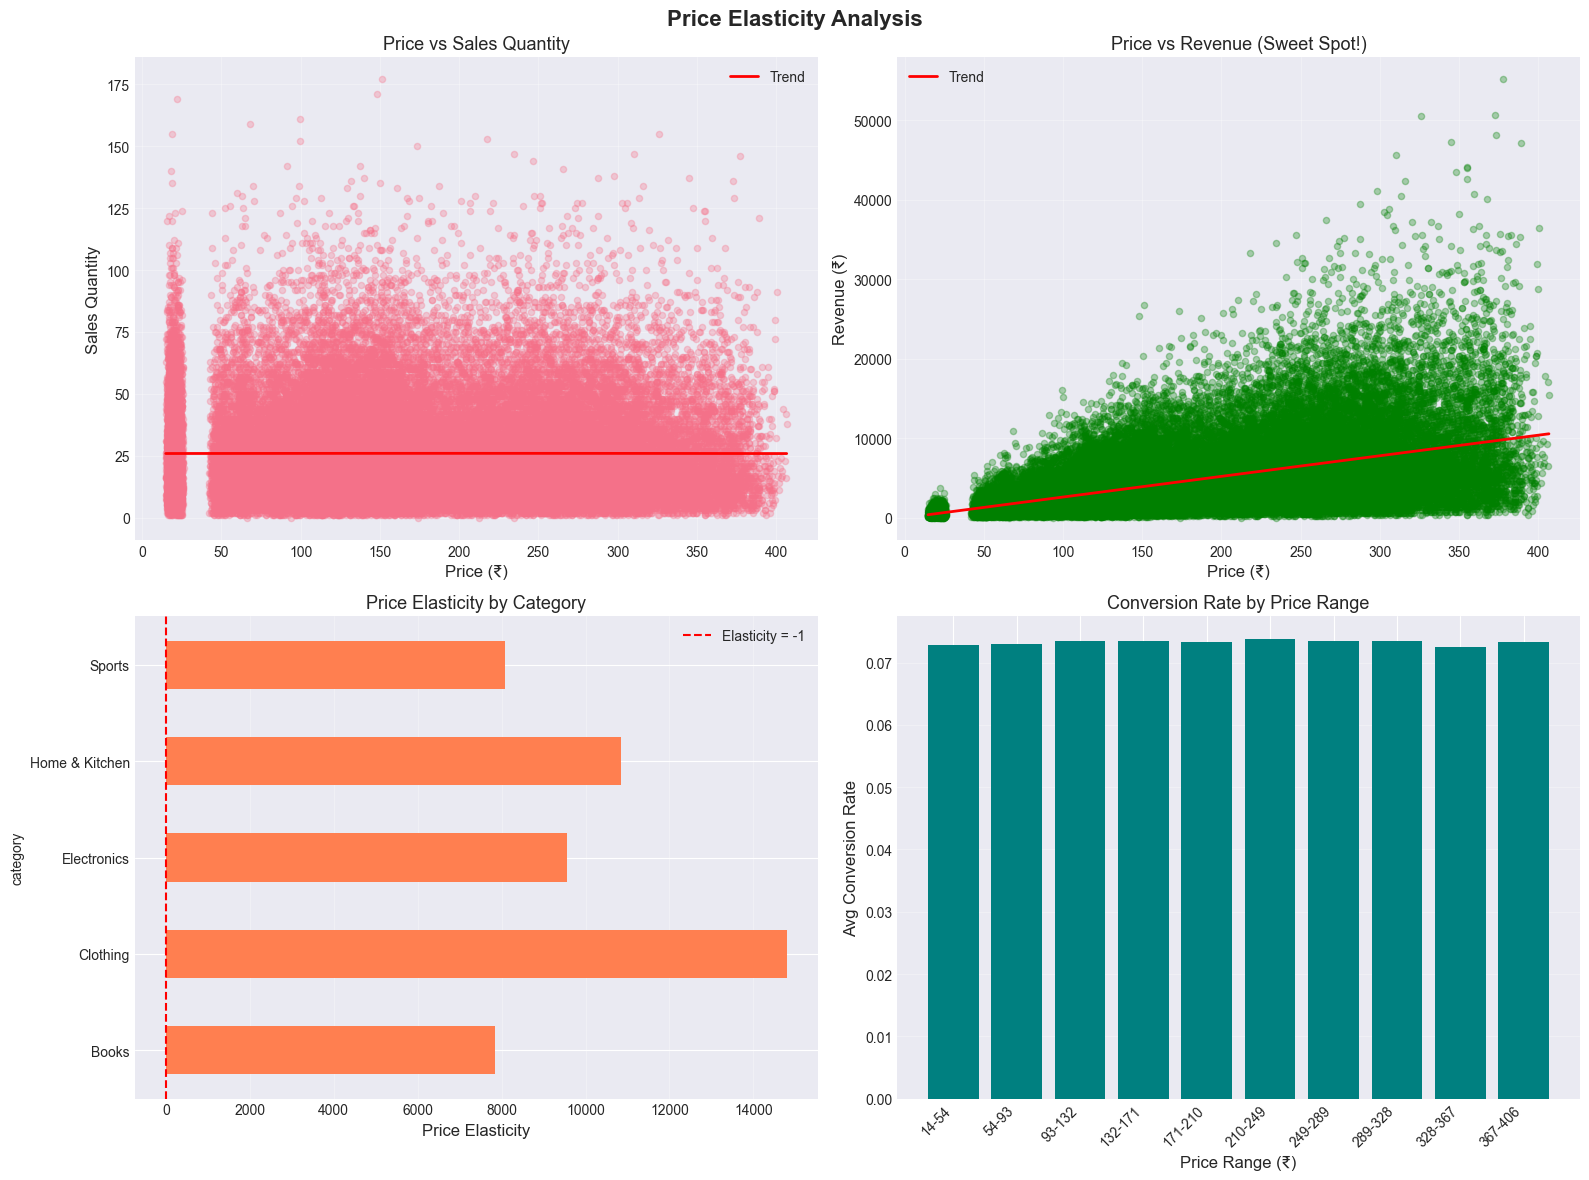

In [8]:
# Create price elasticity visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Price Elasticity Analysis', fontsize=16, fontweight='bold')

# Plot 1: Overall Price vs Sales
axes[0, 0].scatter(df['price'], df['sales_quantity'], alpha=0.3, s=20)
z = np.polyfit(df['price'], df['sales_quantity'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['price'].min(), df['price'].max(), 100)
axes[0, 0].plot(x_line, p(x_line), "r-", linewidth=2, label='Trend')
axes[0, 0].set_xlabel('Price (₹)', fontsize=12)
axes[0, 0].set_ylabel('Sales Quantity', fontsize=12)
axes[0, 0].set_title('Price vs Sales Quantity', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Price vs Revenue
axes[0, 1].scatter(df['price'], df['revenue'], alpha=0.3, s=20, c='green')
z = np.polyfit(df['price'], df['revenue'], 2)
p = np.poly1d(z)
axes[0, 1].plot(x_line, p(x_line), "r-", linewidth=2, label='Trend')
axes[0, 1].set_xlabel('Price (₹)', fontsize=12)
axes[0, 1].set_ylabel('Revenue (₹)', fontsize=12)
axes[0, 1].set_title('Price vs Revenue (Sweet Spot!)', fontsize=13)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Price Elasticity by Category
elasticity_by_category.plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].axvline(x=-1, color='red', linestyle='--', label='Elasticity = -1')
axes[1, 0].set_xlabel('Price Elasticity', fontsize=12)
axes[1, 0].set_title('Price Elasticity by Category', fontsize=13)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Conversion Rate vs Price Bins
df['price_bin'] = pd.cut(df['price'], bins=10)
price_conversion = df.groupby('price_bin').agg({
    'conversion_rate': 'mean',
    'sales_quantity': 'count'
}).reset_index()
price_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in price_conversion['price_bin']]
axes[1, 1].bar(range(len(price_labels)), price_conversion['conversion_rate'], color='teal')
axes[1, 1].set_xticks(range(len(price_labels)))
axes[1, 1].set_xticklabels(price_labels, rotation=45, ha='right')
axes[1, 1].set_xlabel('Price Range (₹)', fontsize=12)
axes[1, 1].set_ylabel('Avg Conversion Rate', fontsize=12)
axes[1, 1].set_title('Conversion Rate by Price Range', fontsize=13)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/eda_visualizations/1_price_elasticity.png', dpi=300, bbox_inches='tight')
print("Saved: 1_price_elasticity.png")
plt.show()

In [9]:
print("\n" + "="*70)
print("SECTION 2: TIME PATTERNS ANALYSIS")
print("="*70)

# Hourly analysis
hourly_sales = df.groupby('hour').agg({
    'sales_quantity': 'mean',
    'revenue': 'mean',
    'page_views': 'mean',
    'conversion_rate': 'mean'
}).reset_index()

print("\nPeak Hours for Sales:")
print(hourly_sales.nlargest(5, 'sales_quantity')[['hour', 'sales_quantity', 'conversion_rate']])

# Daily analysis
daily_sales = df.groupby('day_of_week').agg({
    'sales_quantity': 'mean',
    'revenue': 'mean',
    'conversion_rate': 'mean'
}).reset_index()
daily_sales['day_name'] = daily_sales['day_of_week'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

print("\nSales by Day of Week:")
print(daily_sales[['day_name', 'sales_quantity', 'conversion_rate']])

# Weekend vs Weekday
weekend_comparison = df.groupby('is_weekend').agg({
    'sales_quantity': 'mean',
    'revenue': 'mean',
    'conversion_rate': 'mean',
    'page_views': 'mean'
}).reset_index()
weekend_comparison['period'] = weekend_comparison['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

print("\n Weekend vs Weekday Performance:")
print(weekend_comparison[['period', 'sales_quantity', 'revenue', 'conversion_rate']])


SECTION 2: TIME PATTERNS ANALYSIS

Peak Hours for Sales:
    hour  sales_quantity  conversion_rate
19    19       32.713032         0.073261
22    22       32.562555         0.072816
20    20       32.145761         0.072994
18    18       31.804397         0.072533
21    21       31.702923         0.073896

Sales by Day of Week:
  day_name  sales_quantity  conversion_rate
0      Mon       23.792179         0.073049
1      Tue       23.913077         0.073199
2      Wed       23.655256         0.073289
3      Thu       24.008718         0.073474
4      Fri       24.053205         0.073420
5      Sat       31.188846         0.073519
6      Sun       31.169686         0.073372

 Weekend vs Weekday Performance:
  period  sales_quantity      revenue  conversion_rate
0    NaN       23.884487  4047.330577         0.073286
1    NaN       31.179175  5390.026048         0.073445


Saved: 2_time_patterns.png


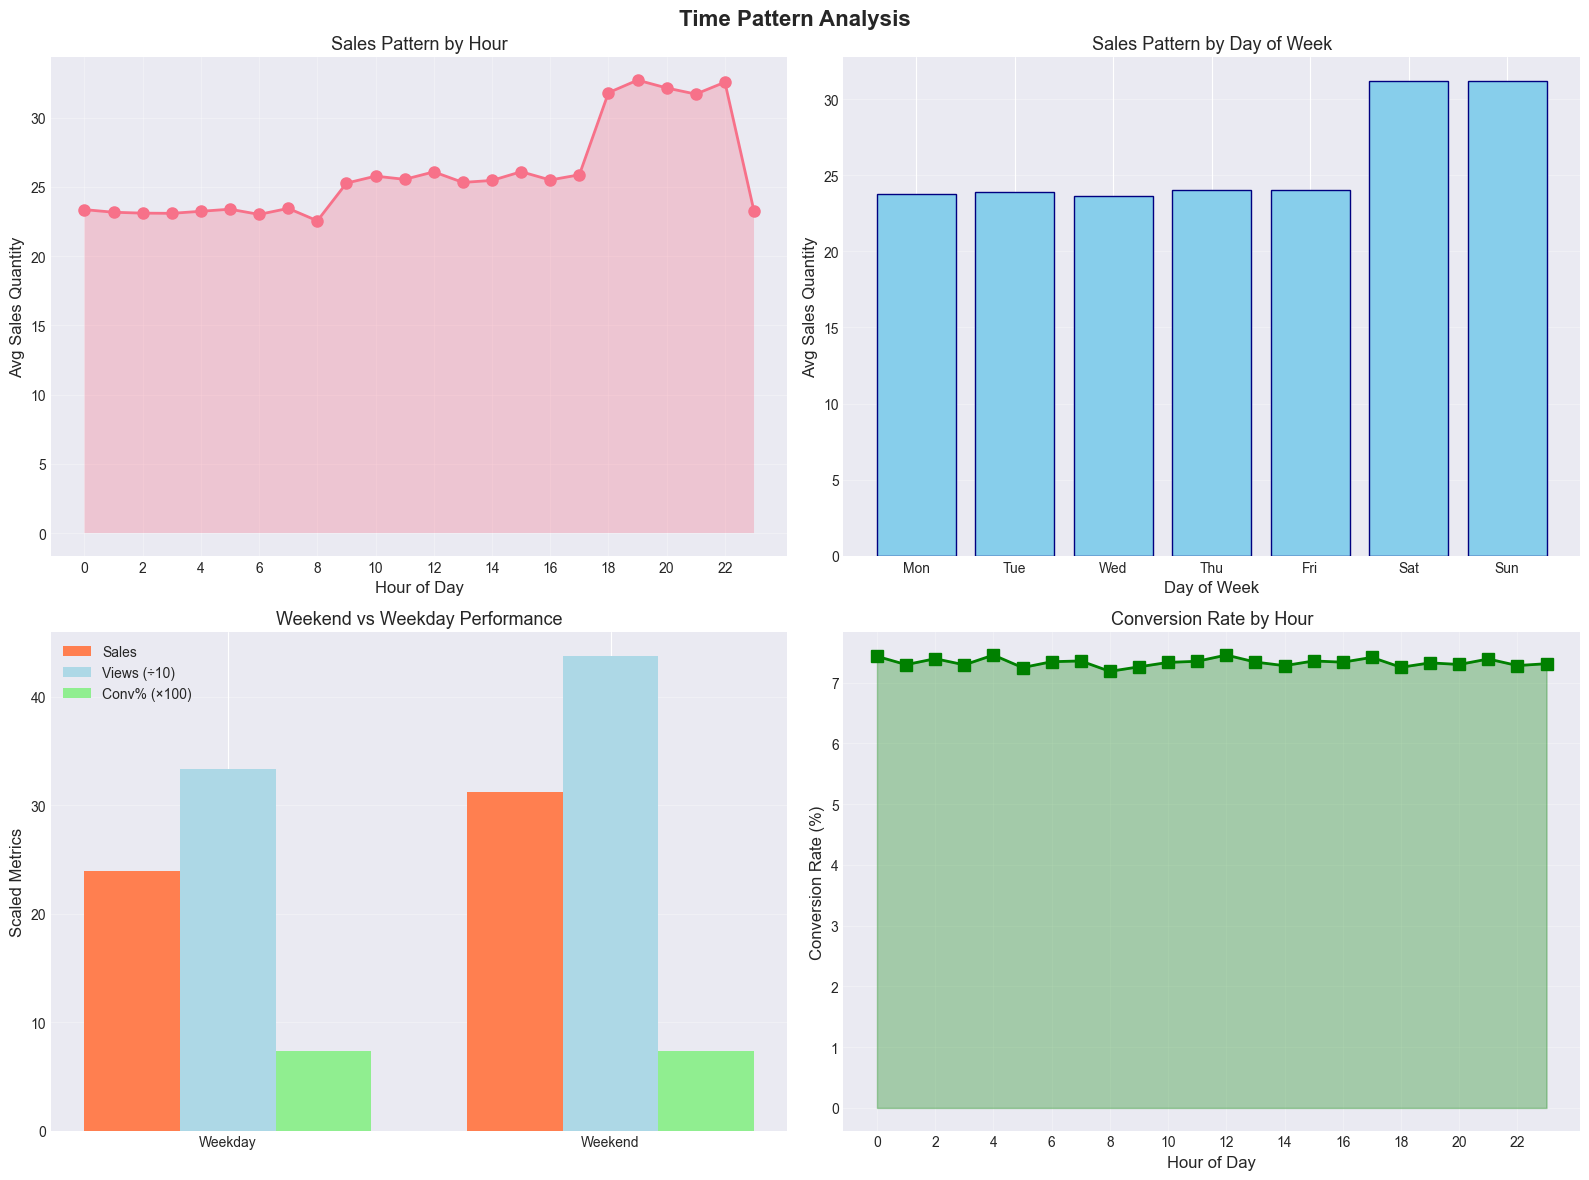

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Pattern Analysis', fontsize=16, fontweight='bold')

# Plot 1: Hourly sales
axes[0, 0].plot(hourly_sales['hour'], hourly_sales['sales_quantity'], marker='o', linewidth=2, markersize=8)
axes[0, 0].fill_between(hourly_sales['hour'], hourly_sales['sales_quantity'], alpha=0.3)
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Avg Sales Quantity', fontsize=12)
axes[0, 0].set_title('Sales Pattern by Hour', fontsize=13)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Plot 2: Daily pattern
axes[0, 1].bar(daily_sales['day_name'], daily_sales['sales_quantity'], color='skyblue', edgecolor='navy')
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Avg Sales Quantity', fontsize=12)
axes[0, 1].set_title('Sales Pattern by Day of Week', fontsize=13)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Weekend vs Weekday - FIXED VERSION
if len(weekend_comparison) >= 2:
    x_pos = [0, 1]
    width = 0.25
    
    # Get values safely
    weekday_sales = weekend_comparison[weekend_comparison['is_weekend']==0]['sales_quantity'].values[0]
    weekend_sales = weekend_comparison[weekend_comparison['is_weekend']==1]['sales_quantity'].values[0]
    weekday_views = weekend_comparison[weekend_comparison['is_weekend']==0]['page_views'].values[0] / 10
    weekend_views = weekend_comparison[weekend_comparison['is_weekend']==1]['page_views'].values[0] / 10
    weekday_conv = weekend_comparison[weekend_comparison['is_weekend']==0]['conversion_rate'].values[0] * 100
    weekend_conv = weekend_comparison[weekend_comparison['is_weekend']==1]['conversion_rate'].values[0] * 100
    
    axes[1, 0].bar([p - width for p in x_pos], 
                   [weekday_sales, weekend_sales], 
                   width, label='Sales', color='coral')
    axes[1, 0].bar(x_pos, 
                   [weekday_views, weekend_views], 
                   width, label='Views (÷10)', color='lightblue')
    axes[1, 0].bar([p + width for p in x_pos], 
                   [weekday_conv, weekend_conv], 
                   width, label='Conv% (×100)', color='lightgreen')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(['Weekday', 'Weekend'])
    axes[1, 0].set_ylabel('Scaled Metrics', fontsize=12)
    axes[1, 0].set_title('Weekend vs Weekday Performance', fontsize=13)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
else:
    axes[1, 0].text(0.5, 0.5, 'Insufficient data for weekend comparison', 
                    ha='center', va='center', fontsize=12)

# Plot 4: Conversion by hour
axes[1, 1].plot(hourly_sales['hour'], hourly_sales['conversion_rate']*100, 
                marker='s', linewidth=2, markersize=8, color='green')
axes[1, 1].fill_between(hourly_sales['hour'], hourly_sales['conversion_rate']*100, alpha=0.3, color='green')
axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
axes[1, 1].set_ylabel('Conversion Rate (%)', fontsize=12)
axes[1, 1].set_title('Conversion Rate by Hour', fontsize=13)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.savefig('../data/processed/eda_visualizations/2_time_patterns.png', dpi=300, bbox_inches='tight')
print("Saved: 2_time_patterns.png")
plt.show()

In [12]:
print("\n" + "="*70)
print("SECTION 3: COMPETITOR PRICING IMPACT")
print("="*70)

# Price positioning
df['price_position'] = pd.cut(df['price_vs_competitor'], 
                              bins=[-np.inf, -0.1, 0.1, np.inf],
                              labels=['Cheaper', 'Similar', 'Expensive'])

position_analysis = df.groupby('price_position').agg({
    'sales_quantity': ['mean', 'count'],
    'revenue': 'mean',
    'conversion_rate': 'mean'
}).reset_index()

print("\nPerformance by Price Position vs Competitor:")
print(position_analysis)


SECTION 3: COMPETITOR PRICING IMPACT

Performance by Price Position vs Competitor:
  price_position sales_quantity             revenue conversion_rate
                           mean  count         mean            mean
0        Cheaper      25.225426   7386  4219.253568        0.072163
1        Similar      25.831717  36504  4400.473631        0.072978
2      Expensive      27.006538  10860  4690.654376        0.075316


Saved: 3_competitor_impact.png


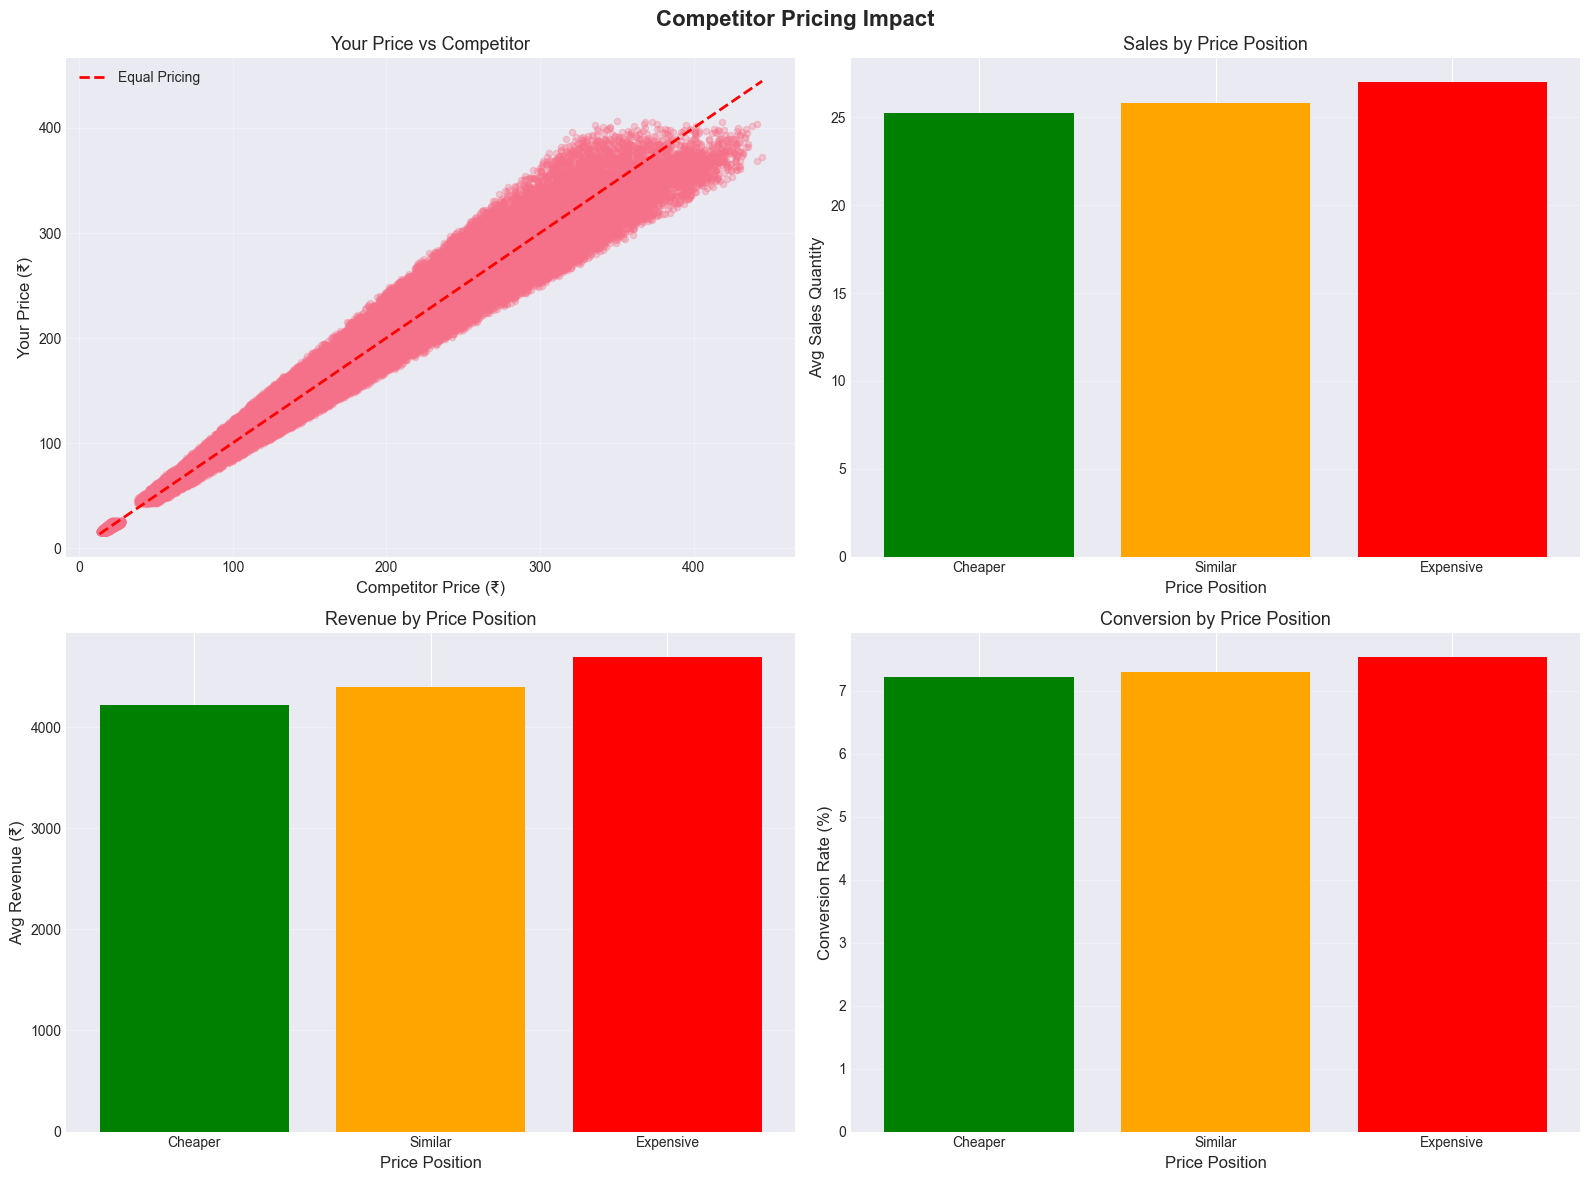

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Competitor Pricing Impact', fontsize=16, fontweight='bold')

# Plot 1: Your Price vs Competitor
axes[0, 0].scatter(df['competitor_price'], df['price'], alpha=0.3, s=20)
axes[0, 0].plot([df['competitor_price'].min(), df['competitor_price'].max()], 
                [df['competitor_price'].min(), df['competitor_price'].max()], 
                'r--', linewidth=2, label='Equal Pricing')
axes[0, 0].set_xlabel('Competitor Price (₹)', fontsize=12)
axes[0, 0].set_ylabel('Your Price (₹)', fontsize=12)
axes[0, 0].set_title('Your Price vs Competitor', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Sales by position
position_sales = df.groupby('price_position')['sales_quantity'].mean()
colors_map = {'Cheaper': 'green', 'Similar': 'orange', 'Expensive': 'red'}
axes[0, 1].bar(position_sales.index, position_sales.values, 
               color=[colors_map[x] for x in position_sales.index])
axes[0, 1].set_xlabel('Price Position', fontsize=12)
axes[0, 1].set_ylabel('Avg Sales Quantity', fontsize=12)
axes[0, 1].set_title('Sales by Price Position', fontsize=13)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Revenue by position
position_revenue = df.groupby('price_position')['revenue'].mean()
axes[1, 0].bar(position_revenue.index, position_revenue.values, 
               color=[colors_map[x] for x in position_revenue.index])
axes[1, 0].set_xlabel('Price Position', fontsize=12)
axes[1, 0].set_ylabel('Avg Revenue (₹)', fontsize=12)
axes[1, 0].set_title('Revenue by Price Position', fontsize=13)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Conversion by position
position_conversion = df.groupby('price_position')['conversion_rate'].mean() * 100
axes[1, 1].bar(position_conversion.index, position_conversion.values, 
               color=[colors_map[x] for x in position_conversion.index])
axes[1, 1].set_xlabel('Price Position', fontsize=12)
axes[1, 1].set_ylabel('Conversion Rate (%)', fontsize=12)
axes[1, 1].set_title('Conversion by Price Position', fontsize=13)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/eda_visualizations/3_competitor_impact.png', dpi=300, bbox_inches='tight')
print("Saved: 3_competitor_impact.png")
plt.show()

In [ ]:
print("\n" + "="*70)
print("KEY INSIGHTS SUMMARY")
print("="*70)

insights = {
    '1. Price Elasticity': f"Average: {elasticity_by_category.mean():.2f}",
    '2. Best Selling Hour': f"{int(hourly_sales.loc[hourly_sales['sales_quantity'].idxmax(), 'hour'])}:00",
    '3. Weekend Boost': f"{(weekend_comparison.loc[1, 'sales_quantity']/weekend_comparison.loc[0, 'sales_quantity']-1)*100:.1f}% higher",
    '4. Best Price Position': f"{position_analysis.loc[position_analysis[('sales_quantity', 'mean')].idxmax(), 'price_position']}",
    '5. Avg Conversion Rate': f"{df['conversion_rate'].mean()*100:.2f}%",
    '6. Revenue Range': f"₹{df['revenue'].min():.2f} - ₹{df['revenue'].max():.2f}"
}

for key, value in insights.items():
    print(f"   {key}: {value}")
print("All visualizations saved in: ../data/processed/eda_visualizations/")


KEY INSIGHTS SUMMARY
   1. Price Elasticity: Average: 10224.73
   2. Best Selling Hour: 19:00
   3. Weekend Boost: 30.5% higher
   4. Best Price Position: Expensive
   5. Avg Conversion Rate: 7.33%
   6. Revenue Range: ₹0.00 - ₹55106.09

 Phase 2 EDA Complete!
All visualizations saved in: ../data/processed/eda_visualizations/
